# Лабораторная работа №5
## Построение модели линейной одномерной регрессии
## Вариант №13



### Цель работы

Bзучение принципов построения модели линейной одномерной регрессии.

### Задачи 

 - реализовать конвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
 - получение навыков рефакторинга кода в задачах машинного обучения.

### Индивидуальное задание

1. Подберите набор данных на ресурсах [2, 3] и согласуйте свой выбор с преподавателем и другими студентами группы, так
как работа над одинаковыми наборами данных недопустима.

https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

2. Выполните построение модели классификации на основе линейной регрессии. В ходе решения задачи необходимо решить следующие подзадачи:
 

#### Подключение библиотек

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [36]:
dataset = pd.read_csv('exams.csv')
dataset = dataset[['reading score', 'writing score']]
dataset = dataset.sample(200)
dataset.sample(10)

,reading score,writing score
316,67,64
210,69,68
903,61,58
42,79,82
729,36,37
43,70,70
155,44,47
100,61,62
224,94,97
652,100,97


In [37]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[48]
 [78]
 [76]
 [72]
 [82]]
Зависимая переменная
[42 75 74 76 80]


#### Разделение выборки на тестовую и тренировочную

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0) 

#### Обучение линейной модели регрессии

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Предсказание, обработка и визуализация результатов

In [50]:
y_pred = regressor.predict(X_test)
print(y_pred)

[57.67563027 89.83151091 50.41462497 81.53321913 72.19764088 60.78748969
 64.93663558 83.60779207 81.53321913 56.6383438  69.08578147 75.3095003
 69.08578147 44.19090614 56.6383438  49.3773385  68.04849499 77.38407324
 69.08578147 93.9806568  61.82477616 51.45191144 61.82477616 46.26547908
 59.75020322 78.42135971 58.71291674 75.3095003  77.38407324 76.34678677
 83.60779207 79.45864619 77.38407324 78.42135971 68.04849499 46.26547908
 79.45864619 81.53321913 84.64507855 96.05522974]


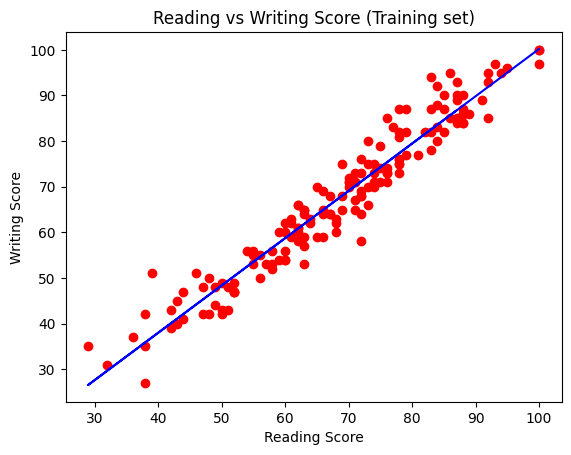

In [51]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Reading vs Writing Score (Training set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

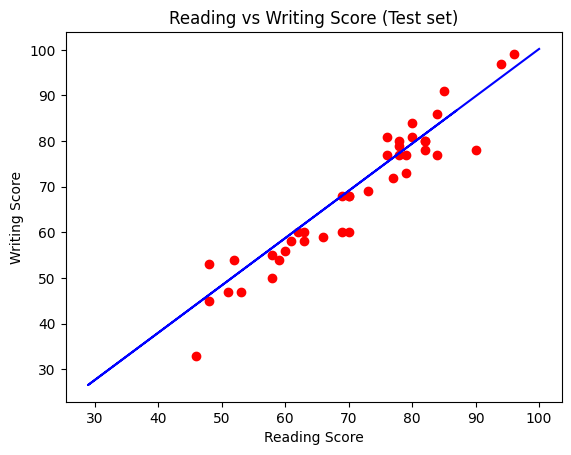

In [52]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Reading vs Writing Score (Test set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

#### Использование модели
Оптимальные параметры определены, можно использовать модель

In [59]:
ReadingScores = [[65], [75], [95]]
regressor.predict(ReadingScores)

array([63.8993491 , 74.27221383, 95.01794327])

In [60]:
a = regressor.coef_
b = regressor.intercept_

reading_score = 65
predicted_writing_score = a * reading_score + b
predicted_writing_score

array([63.8993491])

### Контрольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?


Линейная регрессия не требует масштабирования признаков, потому что веса (коэффициенты) при признаках в линейной модели регрессии можно адаптировать к различным масштабам признаков. В этом суть линейности.

Если в линейной регрессии у нас есть признаки $X_1, X_2, \ldots, X_n$ и соответствующие им веса $w_1, w_2, \ldots, w_n$, то предсказание делается по формуле:

$ \text{Предсказание} = w_1 \cdot X_1 + w_2 \cdot X_2 + \ldots + w_n \cdot X_n + b $

Если признаки имеют разные масштабы, то соответствующие им веса будут адаптироваться так, чтобы учесть этот масштаб. Таким образом, изменение масштаба признаков не влияет на результат линейной регрессии в том смысле, что предсказание будет адекватным и для признаков разных порядков величин.

Это отличается от некоторых других методов машинного обучения, таких как метод опорных векторов (SVM) или метод ближайших соседей (KNN), которые могут быть чувствительны к различиям в масштабе признаков.

2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?


Использование квадратичного отклонения (Mean Squared Error, MSE) в качестве функции потерь при обучении модели линейной регрессии имеет несколько причин:

1. **Дифференцируемость:** Функция потерь должна быть дифференцируемой для эффективного применения методов оптимизации, таких как градиентный спуск. Квадратичная функция потерь дифференцируема по весам, что облегчает обучение модели.

2. **Удобство математического анализа:** Квадратичная функция потерь обеспечивает математически удобные свойства, такие как легкость в анализе и вычислении градиента. Это упрощает процесс обучения и оптимизации модели.

3. **Связь с методом максимального правдоподобия:** Использование квадратичного отклонения в модели линейной регрессии тесно связано с предположением о нормальном распределении ошибок. При использовании метода максимального правдоподобия для оценки параметров модели, минимизация среднеквадратичной ошибки эквивалентна максимизации правдоподобия.

В то время как квадратичное отклонение широко используется, иногда модуль отклонения (Mean Absolute Error, MAE) также может применяться в задачах регрессии, особенно если есть аутлаеры (выбросы), которые могут сильно влиять на MSE. MAE более устойчив к выбросам, так как он не увеличивает штраф за большие ошибки так сильно, как это делает MSE.

3. Что именно реализовано в методе fit(X, y) класса LinearRegression?

Метод `fit(X, y)` в классе `LinearRegression` реализует процесс обучения модели линейной регрессии на основе переданных обучающих данных. Вот, что происходит внутри этого метода:

1. **Подготовка данных:** Метод получает обучающие данные `X` (матрица признаков) и `y` (вектор целевых переменных).

2. **Добавление единичного признака (intercept):** Если необходимо, модель может автоматически добавить единичный признак (intercept), чтобы учесть смещение (bias) в линейной модели.

3. **Вычисление параметров модели:** Происходит вычисление параметров модели (весов) с использованием метода наименьших квадратов (Ordinary Least Squares, OLS) или других методов оптимизации. Это включает в себя вычисление коэффициентов (весов) для каждого признака.

4. **Сохранение параметров:** Полученные параметры модели (веса) сохраняются для дальнейшего использования в предсказаниях.

5. **Обучение завершено:** Модель теперь обучена на предоставленных данных, и ее параметры настроены таким образом, чтобы минимизировать среднеквадратичную ошибку (Mean Squared Error, MSE) или другую функцию потерь.

После выполнения метода `fit`, модель готова к использованию для предсказаний на новых данных.

4. Поясните назначение метода predict класса LinearRegression.

Метод `predict` в классе `LinearRegression` предназначен для получения предсказаний целевых переменных на новых данных на основе обученных весов (параметров) модели линейной регрессии. Вот как он работает:

1. **Подготовка данных:** Метод получает новые данные `X`, на которых нужно сделать предсказания.

2. **Применение обученных весов:** Используя обученные веса (коэффициенты), полученные в результате обучения модели, метод вычисляет предсказания целевых переменных для каждого наблюдения в новых данных.

3. **Возврат предсказаний:** Результатом работы метода является вектор предсказанных значений целевой переменной для каждого наблюдения в новых данных.

Пример использования метода `predict`:

```python
from sklearn.linear_model import LinearRegression

# Создание объекта модели
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Получение предсказаний на новых данных
predictions = model.predict(X_new)
```

Теперь переменная `predictions` содержит предсказанные значения целевой переменной на основе обученной модели.

5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

Оценка точности модели машинного обучения должна производиться на тестовой подвыборке. Важно разделять данные на обучающую и тестовую выборки, чтобы оценить производительность модели на данных, которые она ранее не видела.

**Обучающая выборка:** На этой подвыборке модель "учится" на основе предоставленных данных. Она настраивает свои параметры (веса) таким образом, чтобы минимизировать функцию потерь.

**Тестовая выборка:** После обучения модели ее эффективность оценивается на тестовой выборке. Это позволяет проверить, насколько хорошо модель обобщает знания на новых данных, которые не использовались в процессе обучения. Тестовая выборка предоставляет объективную оценку производительности модели в реальных условиях.

Использование тестовой выборки помогает выявить, насколько модель способна делать точные предсказания на новых, ранее не встреченных данных, и предотвратить переобучение (overfitting) — явление, при котором модель хорошо справляется с обучающими данными, но плохо обобщает на новые данные.